In [79]:
import math
import matplotlib.pyplot as plt
import numpy as np 

In [80]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))
def findRestClass(classes,currentClass):
    restClasses = []
    for i in classes:
        if classes[i]!= currentClass:
            restClasses.append(classes[i])
    return restClasses


Starting training
('Accuracy =', 83.33333333333334)


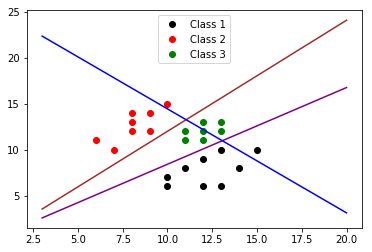

In [81]:
def main():
    
    rows,cols = [3,3]
    
    params = [[0.001,0.001,0.001],[0.001,0.001,0.001],[0.001,0.001,0.001]] # the weights
    # the classes. the bias is added into the class array
    class1 = [[15,10,1],[13,6,1],[14,8,1],[12,9,1],[10,7,1],[12,6,1],[11,8,1],[13,10,1],[10,6,1]]
    class2 = [[8,12,1],[6,11,1],[8,14,1],[9,14,1],[10,15,1],[9,12,1],[7,10,1],[8,13,1]]
    class3 = [[12,12,1],[11,12,1],[12,11,1],[11,11,1],[12,13,1],[13,12,1],[13,13,1]]
    eta = 0.01 # learning rate
    trials = 50000# no of iterations to be done
    train = []# stores the training set
    classes = []#stores the corresponding class of each training data point
    allClasses = [0,1,2]# all classes of the training set
    neurons = [0,0,0] # the initial output of each neuron
    errorArr =[]
    iterations=[]
    #for plotting the points
    tempx = []
    tempy=[]
    tempx2 = []
    tempy2=[]
    tempx3 = []
    tempy3=[]

    for i in range(0,len(class1)):
        tempx.append( class1[i][0])
        tempy.append( class1[i][1])
    for i in range(0,len(class2)):
        tempx2.append( class2[i][0])
        tempy2.append( class2[i][1])
    for i in range(0,len(class3)):
        tempx3.append( class3[i][0])
        tempy3.append( class3[i][1])
    
    plt.plot(tempx, tempy, 'o', color='black',label = "Class 1")
    plt.plot(tempx2, tempy2, 'o', color='red',label = "Class 2")
    plt.plot(tempx3, tempy3, 'o', color='green',label = "Class 3")
    # preparing the training class
    for i in range(0,len(class1)+len(class2)+len(class3)):
        if i <len(class1):
            train.append(class1[i])
            classes.append(0)
        elif i >= len(class1) and i<len(class1)+len(class2):
            train.append(class2[i-len(class1)])
            classes.append(1)
        elif i >= len(class1)+len(class2):
            train.append(class3[i - len(class1) - len(class2)])
            classes.append(2)
    
    print("Starting training")
    for trial in range(0,trials):
        delE = [[0,0,0],[0,0,0],[0,0,0]] # the gradients to update weights of each neuron
        error=0.0
        
        for i in range(0,len(train)):
           # finding the value at each neuron for the training data point
            for j in range(0,len(neurons)):
                neurons[j] = params[j][0]* train[i][0] + params[j][1] * train[i][1] + params[j][2] * train[i][2]
                neurons[j] = sigmoid(neurons[j])
            restClasses = findRestClass(allClasses,classes[i])
            
            # checking if the neuron corresponding the class for which the output must be greater than 0.9 is predicted correctly
            if neurons[classes[i]] < 0.9:
                Od = params[classes[i]][0]* train[i][0] + params[classes[i]][1] * train[i][1] + params[classes[i]][2] * train[i][2]
                Od = sigmoid(Od)
            
            # updating the gradients to make changes to the weights 
                for q in range(0,len(delE[classes[i]])):
                  
                    delE[ classes[i] ][q]= delE[ classes[i] ][q] +  (0.9 - Od) * Od * (1 - Od) * train[i][q]
                error+= (1.0/2) * ( (0.9 - Od)**2 )
            # for the rest of the neurons the output must be less than 0.1
            for n in range(0,len(restClasses)):
                if neurons[restClasses[n]] > 0.1:
                    
                    Od = params[restClasses[n] ][0]* train[i][0] + params[restClasses[n]][1] * train[i][1] + params[restClasses[n]][2] * train[i][2]
                    Od = sigmoid(Od)
                    # updating the gradients to make changes to the weights 
                    for q in range(0,len(delE[restClasses[n] ])):
                        delE[restClasses[n]][q] += (0.1-Od) * Od * (1-Od) * train[i][q]


                    error+=(1.0/2) * ( (0.1 - Od)**2 )
           


        #updation of weights
        for a in range(0,3):
            for b in range(0,3):
                params[a][b] += eta*delE [a][b]
        

        errorArr.append(error)
        iterations.append(trial)

        
    
    
    prop = 0
    for i in range(0,len(train)):
        OdArr = []
        
        for j in range(0,len(neurons)):
            Od = params[j][0]* train[i][0] + params[j][1] * train[i][1] + params[j][2] * train[i][2]
            Od = sigmoid(Od)
            OdArr.append(Od)
       
        predict = 0
        CurrentOd = OdArr[0]
        predict = OdArr.index(max(OdArr))
       
        if predict == classes[i] and max(OdArr)>0.5:
            prop+=1
       
    print("Accuracy =",(float(prop)/ float(len(train)))*100)
    
    # plotting the lines
    x = np.linspace(3, 20, 100) 
    y = - (params[0][0]*x + params[0][2])/ params[0][1]
    plt.plot(x,y,'purple')
    x = np.linspace(3, 20, 100) 
    y = - (params[1][0]*x + params[1][2])/ params[1][1]
    plt.plot(x,y,'brown')
    x = np.linspace(3, 20, 100) 
    y = - (params[2][0]*x + params[2][2])/ params[2][1]
    plt.plot(x,y,'blue')

    """print(params[0],"purple")
    print(params[1],"brown")
    print(params[2],"Blue")"""
    plt.legend()
    plt.show()


        





            
            




    
    

main()